In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#read a file
sales = pd.read_csv("/content/drive/MyDrive/Data_Analyst/Data_Analyst_Details/pizza_sales/pizza_sales .csv")

In [ ]:
#load file
sales.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


#data preprocessing

In [ ]:
#check info of df
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


- Needs to change order_date and order_time data types

In [ ]:
#check missing values
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

- only one data missing with pizza_name

In [ ]:
#Check basic stastics
sales[['quantity','unit_price','total_price']].describe()

,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000
mean,1.019622,16.494132,16.821474
std,0.143077,3.621789,4.437398
min,1.000000,9.750000,9.750000
25%,1.000000,12.750000,12.750000
50%,1.000000,16.500000,16.500000
75%,1.000000,20.250000,20.500000
max,4.000000,35.950000,83.000000


In [ ]:
#now change the data types of order_date and order_time data types
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['order_time'] = pd.to_datetime(sales['order_time'])

<ipython-input-7-39b741ffd30b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['order_date'] = pd.to_datetime(sales['order_date'])


In [ ]:
#check again data types
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 4.5+ MB


In [ ]:
#fill the missing value using fillna with forwaed filling.(for categorical data)
sales.pizza_name.fillna(method = 'ffill' , inplace = True)

In [ ]:
#check with null values
sales.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

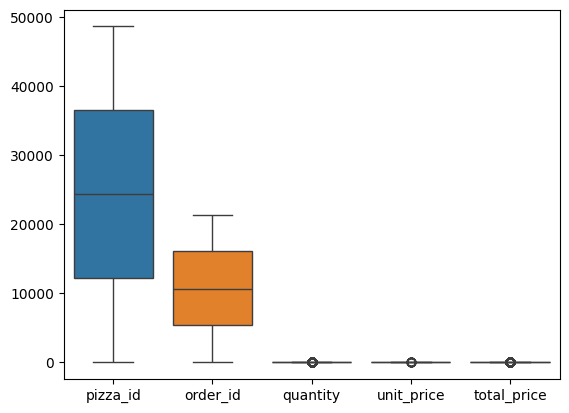

In [ ]:
#check outlier
#method 1: Using boxplot
sns.boxplot(data=sales)
plt.show()

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 4.5+ MB


- As per my assumption there haven't any outlier.
- now data is ready for analysis.
- So we can start with some basic analysis.

In [ ]:
#find total revenue
total_revenue = sum(sales['total_price'])
print(total_revenue)

817860.049999993


In [ ]:
#find Average order value
average_order_value = sales['total_price'].sum() / sales['order_id'].nunique()

print("Average Order Value:", average_order_value)

Average Order Value: 38.30726229508197


In [ ]:
#find pizza sold
pizza_sold = sum(sales['quantity'])
print(pizza_sold)

49574


In [ ]:
#Find total orders
total_orders = sales['order_id'].nunique()
total_orders

21350

In [ ]:
#Find average pizza per order
average_pizza_value = sales['quantity'].sum() / sales['order_id'].nunique()
print("Average pizza Value:", round(average_pizza_value))

Average pizza Value: 2


In [ ]:
#Find total pizza order, total revenue, percentage by pizza size.

result = sales.groupby('pizza_size').agg(
    total_pizza_order=('order_id', 'nunique'),
    total_revenue=('total_price', 'sum')
).reset_index()

# Calculate the percentage of revenue per pizza_size
total_revenue_sum = result['total_revenue'].sum()
result['percentage_of_revenue'] = (result['total_revenue'] * 100) / total_revenue_sum
print(result)

  pizza_size  total_pizza_order  total_revenue  percentage_of_revenue
0          L              12736      375318.70              45.890333
1          M              11159      249382.25              30.492044
2          S              10490      178076.50              21.773468
3         XL                544       14076.00               1.721077
4        XXL                 28        1006.60               0.123077


In [ ]:
#find top 5 revenue with pizza name
top_five = result.sort_values(by='total_revenue', ascending=False).head(5)
top_five

,pizza_size,total_pizza_order,total_revenue,percentage_of_revenue
0,L,12736,375318.70,45.890333
1,M,11159,249382.25,30.492044
2,S,10490,178076.50,21.773468
3,XL,544,14076.00,1.721077
4,XXL,28,1006.60,0.123077


from matplotlib import pyplot as plt
top_five['total_pizza_order'].plot(kind='hist', bins=20, title='total_pizza_order')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_five['total_revenue'].plot(kind='hist', bins=20, title='total_revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_five['percentage_of_revenue'].plot(kind='hist', bins=20, title='percentage_of_revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
top_five.groupby('pizza_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_five.plot(kind='scatter', x='total_pizza_order', y='total_revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_five.plot(kind='scatter', x='total_revenue', y='percentage_of_revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_five['total_pizza_order'].plot(kind='line', figsize=(8, 4), title='total_pizza_order')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_five['total_revenue'].plot(kind='line', figsize=(8, 4), title='total_revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_five['percentage_of_revenue'].plot(kind='line', figsize=(8, 4), title='percentage_of_revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_five['pizza_size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_five, x='total_pizza_order', y='pizza_size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_five['pizza_size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_five, x='total_revenue', y='pizza_size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(top_five['pizza_size'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(top_five, x='percentage_of_revenue', y='pizza_size', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
result = sales.groupby('pizza_name').agg(
    total_revenue=('total_price', 'sum')
)
# Sort the result by total_revenue in ascending order and limit to top 5
result = result.sort_values(by='total_revenue', ascending=True).head(5)

print(result)

                           total_revenue
pizza_name                              
The Brie Carre Pizza            11588.50
The Green Garden Pizza          13955.75
The Spinach Supreme Pizza       15277.75
The Mediterranean Pizza         15360.50
The Spinach Pesto Pizza         15596.00


In [ ]:
#Find bottom 5 total revenue and total quantity, and total order by pizza name
result = sales.groupby('pizza_name').agg(
    total_revenue=('total_price', 'sum'),
    total_quantity=('quantity', 'sum'),
    total_orders=('order_id', 'nunique')
)

# Sort the result by total_revenue in ascending order and limit to top 5
result = result.sort_values(by='total_revenue', ascending=True).head(5)
#result = result.sort_values(by='total_revenue', ascending=False).tail(5) #for bottom 5

print(result)

                           total_revenue  total_quantity  total_orders
pizza_name                                                            
The Brie Carre Pizza            11588.50             490           480
The Green Garden Pizza          13955.75             997           976
The Spinach Supreme Pizza       15277.75             950           918
The Mediterranean Pizza         15360.50             934           912
The Spinach Pesto Pizza         15596.00             970           945
